# OpenCV Face detection with Haar cascades

In [1]:
%cd haar-face-detection

/content/haar-face-detection


### Import Packages

In [2]:
# import the necessary packages
from imutils.video import VideoStream
import matplotlib.pyplot as plt
import argparse
import imutils
import cv2

Function to display images in Jupyter Notebooks and Google Colab

In [3]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

### Implementing face detection with OpenCV and Haar Cascades

In [4]:
args = {
    "image": "images/couz.jpg",
    "cascade": "haarcascade_frontalface_default.xml"
}

In [5]:
# load the haar cascade face detector from
print("[INFO] loading face detector...")
detector = cv2.CascadeClassifier(args["cascade"])

# load the input image from disk, resize it, and convert it to
# grayscale
image = cv2.imread(args["image"])
image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

[INFO] loading face detector...


[INFO] performing face detection...
[INFO] 4 faces detected...


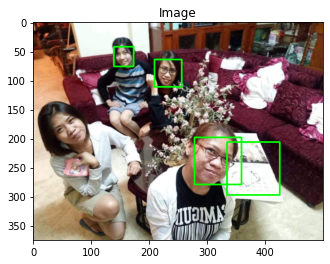

In [6]:
# detect faces in the input image using the haar cascade face
# detector
print("[INFO] performing face detection...")
rects = detector.detectMultiScale(gray, scaleFactor=1.05,
	minNeighbors=5, minSize=(30, 30),
	flags=cv2.CASCADE_SCALE_IMAGE)
print("[INFO] {} faces detected...".format(len(rects)))

# loop over the bounding boxes
for (x, y, w, h) in rects:
	# draw the face bounding box on the image
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# show the output image
plt_imshow("Image", image)

### Implementing real-time face detection with Haar cascade

In [7]:
args = {
    "input": "face_detection.mp4",
    "output": "output.avi",
    "cascade": "haarcascade_frontalface_default.xml"
}

In [8]:
# load the haar cascade face detector from
print("[INFO] loading face detector...")
detector = cv2.CascadeClassifier(args["cascade"])

# grab a reference to the video file and initialize pointer to output
# video file
print("[INFO] opening video file...")
vs = cv2.VideoCapture(args["input"])
writer = None

[INFO] loading face detector...
[INFO] opening video file...


In [9]:
# loop over the frames from the video stream
while True:
	# grab the next frame
	frame = vs.read()[1]

	# if we did not grab a frame then we have reached the end of the
	# video
	if frame is None:
		break
    
    # resize the frame and convert it to grayscale
	frame = imutils.resize(frame, width=500)
	gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

	# perform face detection
	rects = detector.detectMultiScale(gray, scaleFactor=1.05,
		minNeighbors=5, minSize=(30, 30),
		flags=cv2.CASCADE_SCALE_IMAGE)
 

	# loop over the bounding boxes
	for (x, y, w, h) in rects:
		# draw the face bounding box on the image
		cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

	# if the video writer is None *AND* we are supposed to write
	# the output video to disk initialize the writer
	if writer is None and args["output"] is not None:
		fourcc = cv2.VideoWriter_fourcc(*"MJPG")
		writer = cv2.VideoWriter(args["output"], fourcc, 20,
			(frame.shape[1], frame.shape[0]), True)
  
	# if the writer is not None, write the frame to disk
	if writer is not None:
		writer.write(frame)

# do a bit of cleanup
vs.release()

# check to see if the video writer point needs to be released
if writer is not None:
	writer.release()

Note that the above code block may take time to execute. If you are interested to view the video within Colab just execute the following code blocks. Note that it may be time-consuming.

Our output video is produced in `.avi` format. First, we need to convert it to `.mp4` format.

In [10]:
!ffmpeg -i output.avi output.mp4

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [11]:
#@title Display video inline
from IPython.display import HTML
from base64 import b64encode

mp4 = open("output.mp4", "rb").read()
dataURL = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % dataURL)